In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
le= LabelEncoder()
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('/content/02-14-2018.csv')

In [ ]:
data.shape

(1048575, 80)

In [ ]:
data["Label"].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)

In [ ]:
data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [ ]:
number_of_columns = data.shape[1]
print(number_of_columns)

80


In [ ]:
print(data.columns)

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
# Remove erroneous 'Label' row
data.drop(data.loc[data["Label"] == "Label"].index, inplace=True)

In [ ]:
data["Label"].value_counts()

,count
Label,
Benign,611216
DDOS attack-HOIC,68601
DoS attacks-Hulk,46191
Bot,28619
FTP-BruteForce,19336
SSH-Bruteforce,18759
Infilteration,16193
DoS attacks-SlowHTTPTest,13989
DoS attacks-GoldenEye,4151


In [ ]:
X = data.iloc[:, 0:79]
y = data.iloc[:, 79]
y.head()


,Label
0,Benign
1,Benign
2,Benign
3,Benign
4,Benign


In [ ]:
data["Label"].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)

Importing libraries

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

Scatter Plot

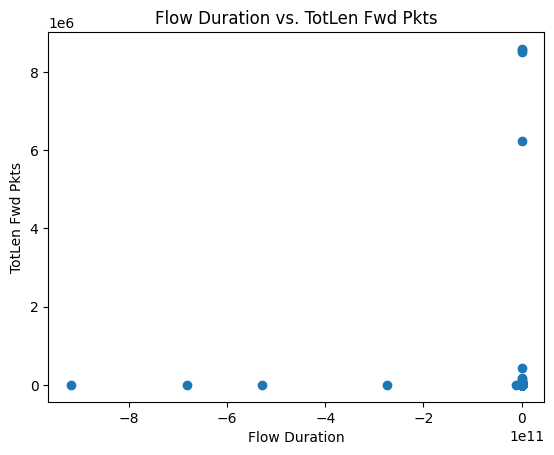

In [ ]:
plt.scatter(data['Flow Duration'], data['TotLen Fwd Pkts'])
plt.xlabel('Flow Duration')
plt.ylabel('TotLen Fwd Pkts')
plt.title('Flow Duration vs. TotLen Fwd Pkts')
plt.show()

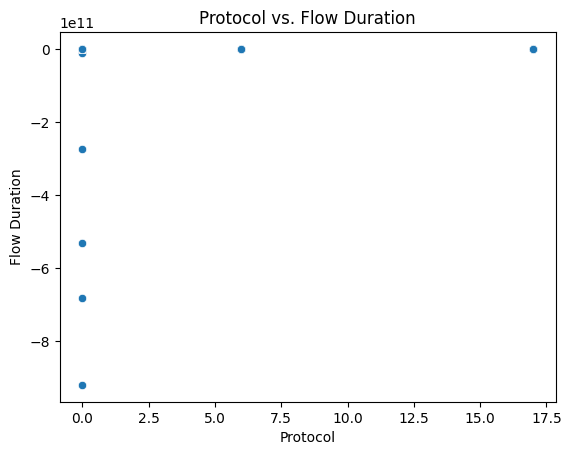

In [ ]:
sns.scatterplot(x='Protocol', y='Flow Duration', data=data)
plt.xlabel('Protocol')
plt.ylabel('Flow Duration')
plt.title('Protocol vs. Flow Duration')
plt.show()

KMeans Clustering

In [ ]:

features = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Flow Byts/s',
            'Flow Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
            'Flow IAT Mean', 'Fwd IAT Mean', 'Bwd IAT Mean']

data_clean = data.dropna(subset=features)


data_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
data_clean = data_clean.dropna(subset=features)
X = data_clean[features].values
large_values = np.where(X > np.finfo(np.float64).max)
if large_values[0].size > 0:
    X[large_values] = np.finfo(np.float64).max

# Scaling the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<ipython-input-56-c10c12193446>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.replace([np.inf, -np.inf], np.nan, inplace=True)


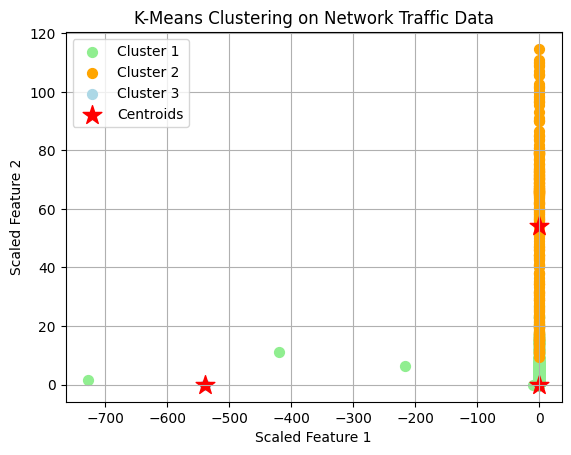

In [ ]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_km = kmeans.fit_predict(X_scaled)

# Plotting K-Means results (assuming we use the first two features for the scatter plot)
plt.scatter(X_scaled[y_km == 0, 0], X_scaled[y_km == 0, 1], s=50, label='Cluster 1', color='lightgreen')
plt.scatter(X_scaled[y_km == 1, 0], X_scaled[y_km == 1, 1], s=50, label='Cluster 2', color='orange')
plt.scatter(X_scaled[y_km == 2, 0], X_scaled[y_km == 2, 1], s=50, label='Cluster 3', color='lightblue')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, marker='*', c='red', label='Centroids')

# Adding labels and title
plt.title('K-Means Clustering on Network Traffic Data')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.legend()
plt.grid()
plt.show()

As kmeans with normal data didn't provide the visual difference between clusters , i opted for pca for kmeans clustering

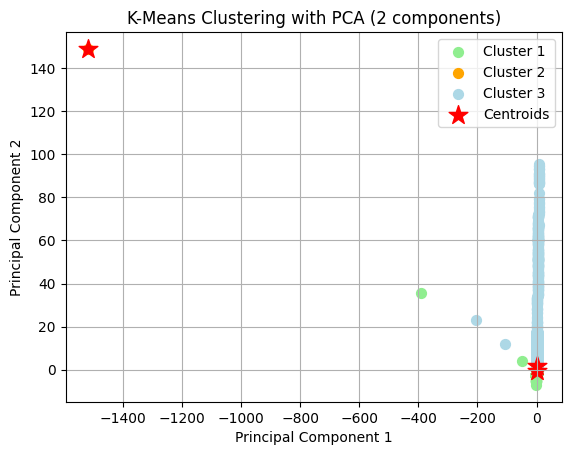

In [ ]:
from sklearn.decomposition import PCA

# Applying PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Applying K-Means clustering on the reduced data
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_km = kmeans.fit_predict(X_pca)

# Plotting the clusters
plt.scatter(X_pca[y_km == 0, 0], X_pca[y_km == 0, 1], s=50, label='Cluster 1', color='lightgreen')
plt.scatter(X_pca[y_km == 1, 0], X_pca[y_km == 1, 1], s=50, label='Cluster 2', color='orange')
plt.scatter(X_pca[y_km == 2, 0], X_pca[y_km == 2, 1], s=50, label='Cluster 3', color='lightblue')

# Plotting the centroids on the reduced PCA components
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, marker='*', c='red', label='Centroids')

# Adding labels and title
plt.title('K-Means Clustering with PCA (2 components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()


In [ ]:
print('Distortion: %.2f' % kmeans.inertia_)

Distortion: 1561388.54


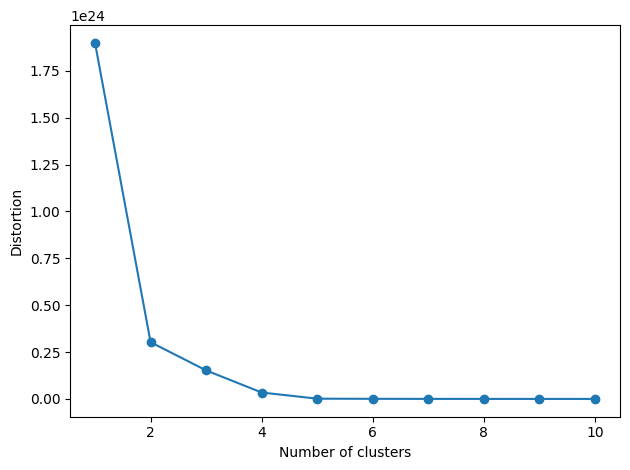

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

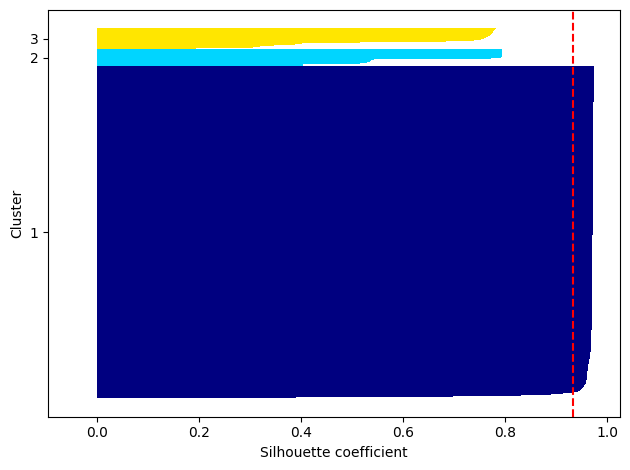

In [ ]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()


Organizing clusters as a hierarchical tree

In [ ]:

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df


,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


Performing hierarchical clustering on a distance matrix

In [ ]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [ ]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [ ]:
# 1. incorrect approach: Squareform distance matrix

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

<ipython-input-64-5f9416c4ffce>:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters = linkage(row_dist, method='complete', metric='euclidean')


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [ ]:
# 2. correct approach: Condensed distance matrix

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [ ]:
# 3. correct approach: Input sample matrix

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


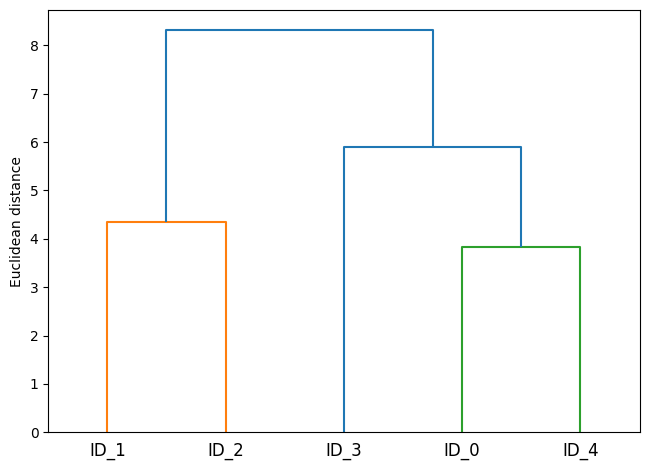

In [ ]:
row_dendr = dendrogram(row_clusters,
                       labels=labels,
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

Attaching dendrograms to a heat map

<ipython-input-68-96756cd75ad1>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
<ipython-input-68-96756cd75ad1>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


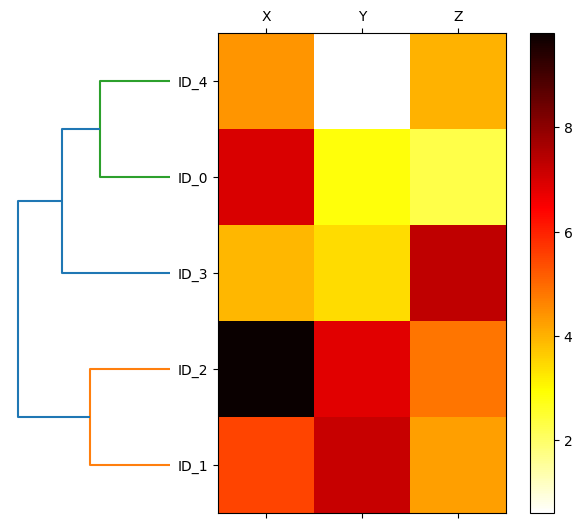

In [ ]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

# plt.savefig('./figures/heatmap.png', dpi=300)
plt.show()

Applying agglomerative clustering via scikit-learn

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             metric='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


Locating regions of high density via DBSCAN

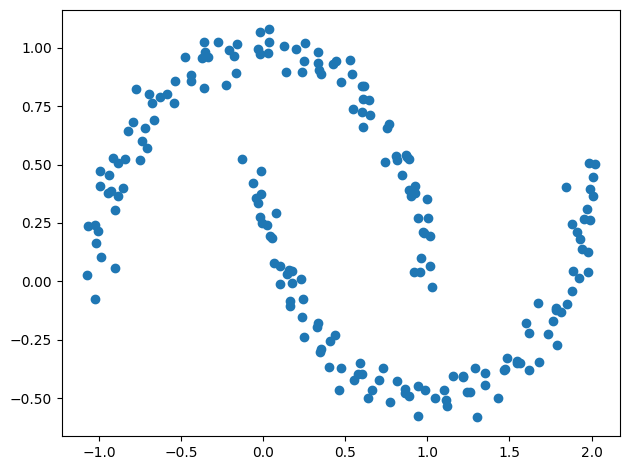

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

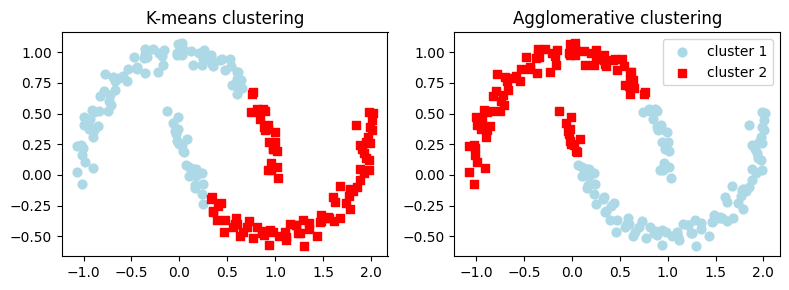

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             metric='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
#plt.savefig('./figures/kmeans_and_ac.png', dpi=300)
plt.show()

Density based clustering

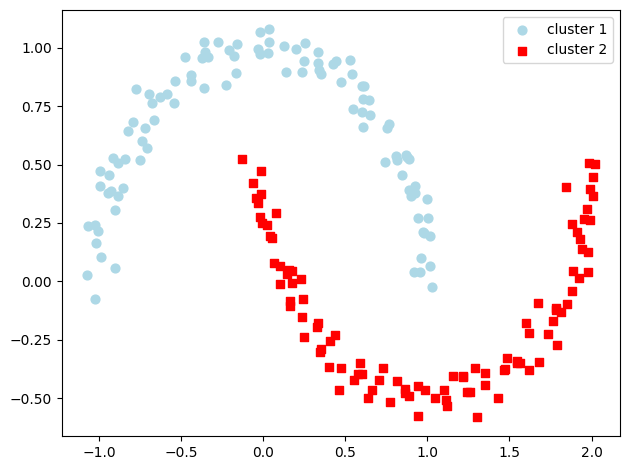

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            label='cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('./figures/moons_dbscan.png', dpi=300)
plt.show()

Clustered dataset

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
y_km = kmeans.fit_predict(X_scaled)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
y_ac = agg_clustering.fit_predict(X_scaled)

# Creating a DataFrame to compare results
df_comparison = pd.DataFrame(X_scaled, columns=features)
df_comparison['KMeans_Cluster'] = y_km
df_comparison['Agglomerative_Cluster'] = y_ac

# Displaying the first few rows of the DataFrame
print(df_comparison.head())

In [ ]:
# Contingency table for K-Means
contingency_km = pd.crosstab(df_comparison['Original_Class'], df_comparison['KMeans_Cluster'])
print("Contingency Table for K-Means:\n", contingency_km)

# Contingency table for Agglomerative Clustering
contingency_ac = pd.crosstab(df_comparison['Original_Class'], df_comparison['Agglomerative_Cluster'])
print("\nContingency Table for Agglomerative Clustering:\n", contingency_ac)


NameError: name 'pd' is not defined

In [ ]:
def calculate_purity(original_labels, cluster_labels):

    contingency_matrix = pd.crosstab(original_labels, cluster_labels)
    total_correct = 0
    for cluster in contingency_matrix.columns:
        total_correct += contingency_matrix[cluster].max()

    purity = total_correct / len(original_labels)
    return purity, contingency_matrix

#  purity for K-Means
purity_km, contingency_km = calculate_purity(df_comparison['Original_Class'], df_comparison['KMeans_Cluster'])
print("Purity for K-Means Clustering: {:.2f}".format(purity_km))
print("Contingency Table for K-Means:\n", contingency_km)

#  purity for Agglomerative Clustering
purity_ac, contingency_ac = calculate_purity(df_comparison['Original_Class'], df_comparison['Agglomerative_Cluster'])
print("\nPurity for Agglomerative Clustering: {:.2f}".format(purity_ac))
print("Contingency Table for Agglomerative Clustering:\n", contingency_ac)

In [ ]:
def calculate_purity_per_class(original_labels, cluster_labels):
    unique_classes = np.unique(original_labels)
    purity_per_class = {}

    for cls in unique_classes:
        mask = original_labels == cls
        cluster_counts = pd.Series(cluster_labels[mask]).value_counts()

        if not cluster_counts.empty:
            purity_per_class[cls] = cluster_counts.max() / mask.sum()
        else:
            purity_per_class[cls] = 0.0  # No samples for this class

    return purity_per_class

# Purity for K-Means
purity_km_per_class = calculate_purity_per_class(df_comparison['Original_Class'], df_comparison['KMeans_Cluster'])
print("Purity for K-Means by Class:", purity_km_per_class)

# Purity for Agglomerative Clustering
purity_ac_per_class = calculate_purity_per_class(df_comparison['Original_Class'], df_comparison['Agglomerative_Cluster'])
print("Purity for Agglomerative Clustering by Class:", purity_ac_per_class)
